Preprocessing steps: 

- Convert to lowercase (Gabe)
- Remove punctuation (Gabe)
- Standardizing whitespace (Gabe)
- Remove/convert numbers (Gabe)
- Remove Stop words (Gabe)
- Tokenization (Gabe)

In [20]:
import pandas as pd
import spacy 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
df = pd.read_csv("C:\MSAAI\AAI-520\Generative_ChatBot_Final\clean_dataset\movie_lines.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   line_id         304713 non-null  object
 1   character_id    304713 non-null  object
 2   movie_id        304713 non-null  object
 3   character_name  304670 non-null  object
 4   line_text       304446 non-null  object
dtypes: object(5)
memory usage: 11.6+ MB


In [4]:
df.head()

,line_id,character_id,movie_id,character_name,line_text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [5]:
non_string_values = df[~df['line_text'].apply(lambda x: isinstance(x, str))]
print(non_string_values)

        line_id character_id movie_id    character_name line_text
538        L474           u5       m0       KAT +++$+++       NaN
5637     L24609         u224      m14     SYKES +++$+++       NaN
36526   L239088        u1125      m74    JANOSZ +++$+++       NaN
45298   L283548        u1356      m90     BRUCE +++$+++       NaN
49894   L303243        u1475     m100       JOE +++$+++       NaN
...         ...          ...      ...               ...       ...
289507  L624042        u8606     m583     VIXIS +++$+++       NaN
299552  L649938        u8876     m603    LASHER +++$+++       NaN
299714  L649416        u8879     m603   MICHAEL +++$+++       NaN
303350  L663421        u8980     m612  DREIBERG +++$+++       NaN
304605  L666160        u9020     m615      INGA +++$+++       NaN

[267 rows x 5 columns]


Since we have NaN values. Lets decide what to do. For simplicity, at this time let's remove them.  

In [6]:
df = df.dropna(subset=['line_text'])

Checking to make sure there are NaN values based on the df['line_text'] column. 

In [7]:
non_string_values = df[~df['line_text'].apply(lambda x: isinstance(x, str))]
print(non_string_values)

Empty DataFrame
Columns: [line_id, character_id, movie_id, character_name, line_text]
Index: []


In [8]:
def text_cleaner(text):
    """puts a dataframe column filled with strings as its observations 
    through cleaning steps in prepatation for tokenization"""
    
    # Remove digits
    text = re.sub(r'\d', '', text)

    # make all text lowercase:
    text = text.lower()
    
    # Remove any non-alphanumeric characters, excluding whitespace:
    text = re.sub('[^\w\s]', '', text)
    
    # Standardizing whitespace:
    text = ' '.join(text.split()).replace('\u00A0', ' ').strip()

    return text 
 

In [9]:
df['line_text']

0                                              They do not!
1                                               They do to!
2                                                I hope so.
3                                                 She okay?
4                                                 Let's go.
                                ...                        
304708    Lord Chelmsford seems to want me to stay back ...
304709    I'm to take the Sikali with the main column to...
304710                             Your orders, Mr Vereker?
304711    Good ones, yes, Mr Vereker. Gentlemen who can ...
304712    Colonel Durnford... William Vereker. I hear yo...
Name: line_text, Length: 304446, dtype: object

In [10]:
df['line_text'] = df['line_text'].apply(text_cleaner)

In [11]:
df.head()

,line_id,character_id,movie_id,character_name,line_text
0,L1045,u0,m0,BIANCA,they do not
1,L1044,u2,m0,CAMERON,they do to
2,L985,u0,m0,BIANCA,i hope so
3,L984,u2,m0,CAMERON,she okay
4,L925,u0,m0,BIANCA,lets go


In [ ]:
# save new CSV for Cleaned_Movie_Lines


### Exploratory Data Analysis (DRAFT)

In [17]:
cloud_text = " ".join(line for line in df['line_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', max_words=200).generate(cloud_text)
                            

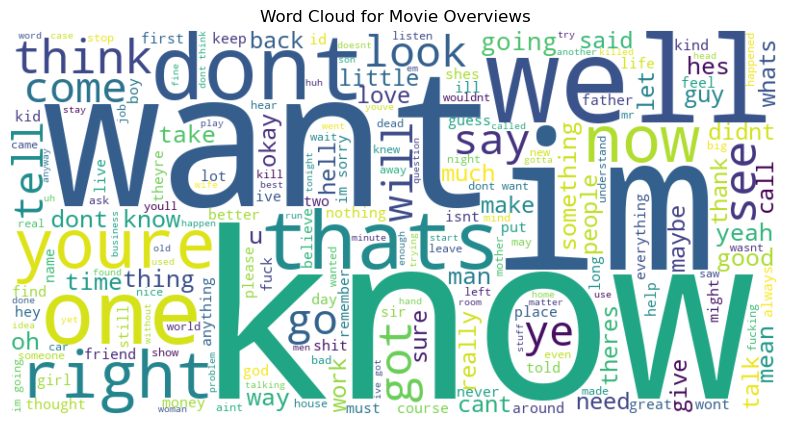

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Overviews')
plt.show()

In [21]:
words = " ".join(df['line_text']).split()
word_counts = Counter(words)
common_words = word_counts.most_common(20)
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

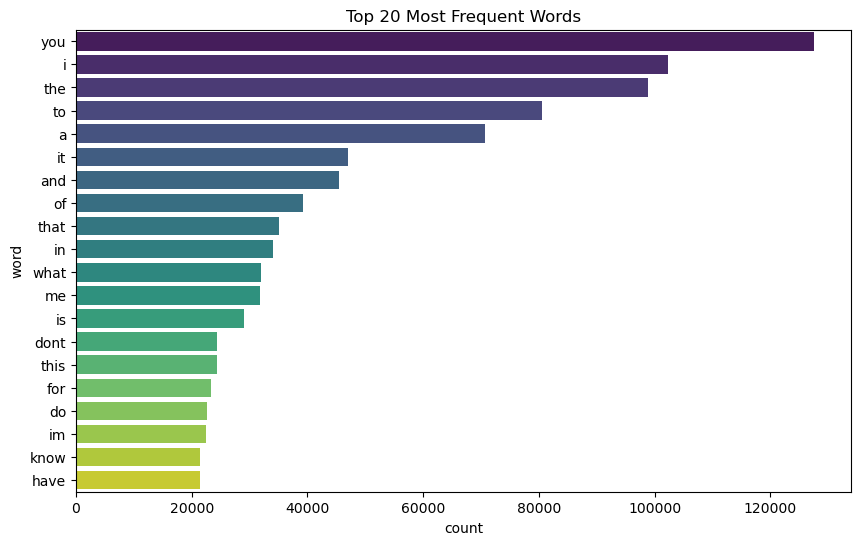

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=word_df, palette='viridis')
plt.title("Top 20 Most Frequent Words")
plt.show()

In [23]:
df['text_length'] = df['line_text'].apply(lambda x: len(x.split()))

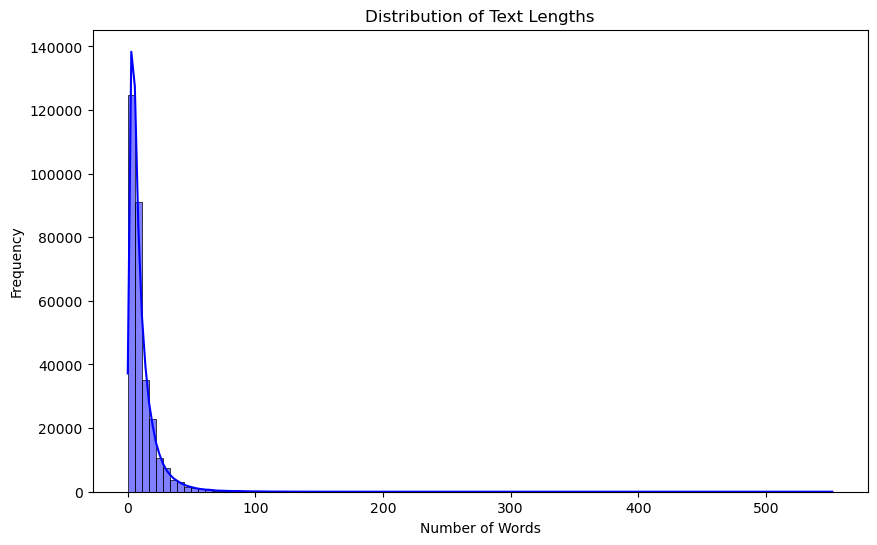

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=100, kde=True, color='blue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [12]:
nlp = spacy.load("en_core_web_sm") # we neeed to consider changing this to md or lg 

In [13]:
df['tokens'] = df['line_text'].apply(lambda text: [token.text for token in nlp(text)])

In [14]:
df.head()

,line_id,character_id,movie_id,character_name,line_text,tokens
0,L1045,u0,m0,BIANCA,they do not,"[they, do, not]"
1,L1044,u2,m0,CAMERON,they do to,"[they, do, to]"
2,L985,u0,m0,BIANCA,i hope so,"[i, hope, so]"
3,L984,u2,m0,CAMERON,she okay,"[she, okay]"
4,L925,u0,m0,BIANCA,lets go,"[lets, go]"


Here I have functions for different preprocessing tasks, not an exhaustive list. 

Note that I am basing each function on the central dataframe, into which new columns will be generated (e.i. entities, pos tags, etc.)

-----------------------------------------------------------------------------------------------

Function Pool:

In [7]:
def text_preprocessor(text):
    """puts text through pre-tokenization preprocessing steps"""
    # Standardizing whitespace:
    text = ' '.join(text.split()).replace('\u00A0', ' ').strip()
    
    return text 


def tokenize(text):
    """Tokenizes text"""
    doc = nlp(text)
    return doc

df['doc'] = df['line_text'].apply(text_preprocessor).apply(tokenize)

def entity_exctractor(doc):
    """Extracts named entities from the text"""
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    return entities

df['entities'] = df['doc'].apply(entity_exctractor)


def pos_tagger(doc):
    """Extracts POS tags"""
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

df['pos_tags'] = df['doc'].apply(pos_tagger) 

AttributeError: 'float' object has no attribute 'split'